# Cardio Fitness Analysis







# Objective


> Explore dataset related to related to customers of the treadmill product of a retail store called Cardio Good Fitness to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. 

# Key Requirement 
  1. Come up with a customer profile (characteristics of a customer) of the
     different products
  2.  Perform univariate and multivariate analyses
  3.  Generate a set of insights and recommendations that will help
     the company in targeting new customers.

# Data Dictionary

 The data is about customers of the treadmill product(s) of a retail 
 store called Cardio Good Fitness. It contains the following variables-

      1.   Product - The model no. of the treadmill
      2.   Age -  Age of the customer in no of years
      3.   Gender - Gender of the customer
      4.   Education - Education of the customer in no. of years
      5.   Marital Status - Marital status of the customer
      6.   Usage - Avg. # times the customer wants to use the treadmill every week
      7.   Fitness - Self rated fitness score of the customer (5 - very fit,
          1 -    very   unfit)
      8.   Income - Income of the customer
      9.   Miles- Miles that a customer expects to run


In [112]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to help with data visualization
%matplotlib inline

In [113]:

# To connect to Google drive and use Google Colab 

from google.colab import drive

In [114]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading DataSet from csv file


In [115]:
data=pd.read_csv('/content/drive/MyDrive/Python/CardioGoodFitness.csv')

# Copying Data into another dataframe to keep original copy intact.




In [116]:
CardioFitnessData=data.copy()

To check top 5 rows to get some understanding of CardioFitness Data set

In [117]:
CardioFitnessData.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


# Sanity Check
   
*  Check data set for it's record count
*  Check data type  for all variables and check if any data type correction is needed
*  Check for missing values

In [118]:
CardioFitnessData.shape


(180, 9)

 Dataset  has  180 rows and 9 columns 

In [119]:
CardioFitnessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Data set comprises of 6 numerical and 3 object type columns.

In [120]:
CardioFitnessData.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Data set don't have any null/missing valules.


1.  Let us check statistical summary for the dataset

In [121]:
CardioFitnessData.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


Based on statistical summary we can see that,

1. There are 3 product types and majority of the customers are using Product TM195
2. As comapred to female there are more Male users who are using these Fitness products.
3. 75 % users of these Fitness Product have Age  less and or equal to 33 years 
4. 75 % of the people who are using these products have income less than 
  59,000 with avarage income as 53,719.
5. 75 % people using these products have termed themself as Fit with Fitness score as 4 .

# Univariate analysis of Numerical columns

 In CardioFitness Dataset Age , Education , Usage , Fitness , Income and Miles are Numerical columns.
  

  User defined function ,"**checkDistribution**" will plot Histplot and Box Plot for all numerical columns.In Boxplot we will add showmeans =true to show Mean value , which will help us in comparing mean and median values.

In [122]:
def checkDistribution(dataframe,columnName):
  #To Plot Histplot with density curve
  sns.histplot(data=dataframe,x=columnName,kde=True )
  plt.tight_layout()
  plt.show()  
   # To plot Bolxplot and showing Mean value
  sns.boxplot(data=dataframe,x=columnName ,showmeans=True )

Let us call function "checkDistribution"  to plot Histplot and Boxplot for Age


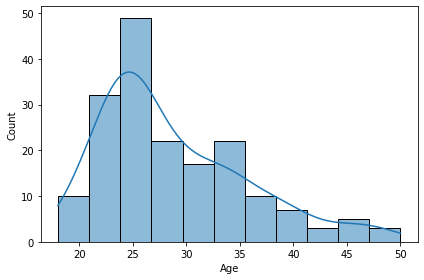

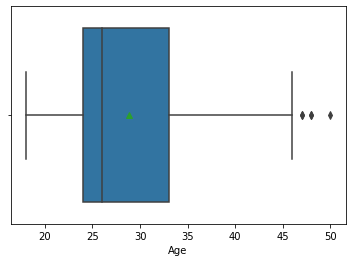

In [123]:
checkDistribution(CardioFitnessData,'Age')

Looking at data we can see that Age is right skewed with mean value greater  than median with few outliers bewtween 40 to 50 


Let us call function "checkDistribution" to plot Histplot and Boxplot for Educaton

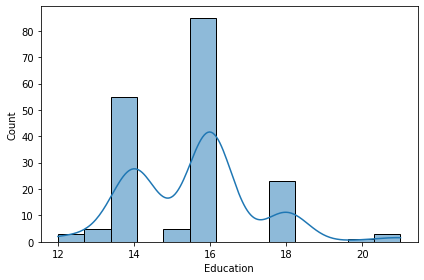

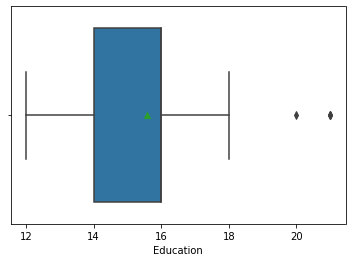

In [124]:
checkDistribution(CardioFitnessData,'Education')

Looking at data majority of users have education level as 16  and very few ourliers with education level 20 or more .

Let us call "checkDistribution" to plot Histplot and Boxplot for Usage

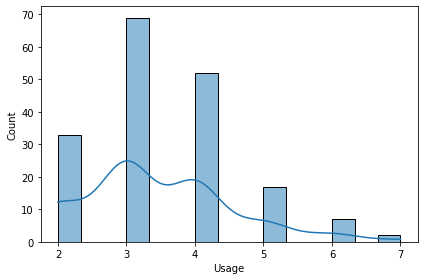

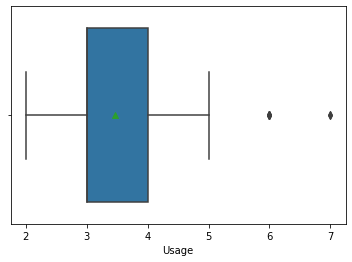

In [125]:
checkDistribution(CardioFitnessData,'Usage')

Most of the users are using fitness Products trice a week with some exceptional users using it alomost entire week.

Let us call "checkDistribution" to plot Histplot and Boxplot for Fitness


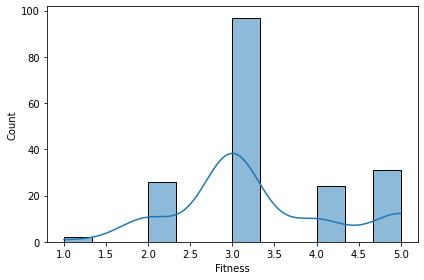

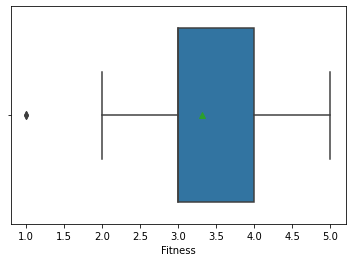

In [126]:
checkDistribution(CardioFitnessData,'Fitness')

Fitness curve appears to be normally distributed with average usage between 3 and 3.5 .

Let us call our user defined function "checkDistribution" to plot Histplot and Boxplot for Income

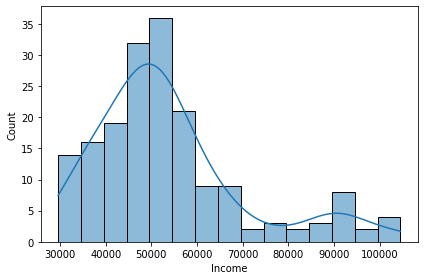

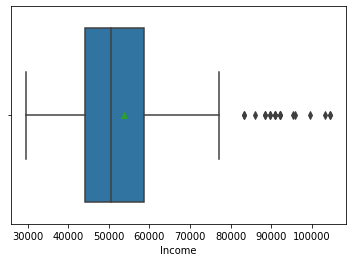

In [127]:
checkDistribution(CardioFitnessData,'Income')

Income is righer skewed data with averange income around 55,000 and 75 % of the users with Income less than 60,000 . We can  see some users with icome higher than 80,000

Let us call "checkDistribution" to plot Histplot and Boxplot for Mile

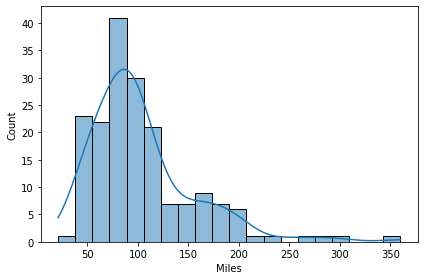

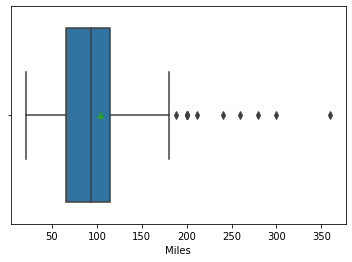

In [128]:
checkDistribution(CardioFitnessData,'Miles')

Miles is also right skewed data where 75% users have miles range  less than 104 but it  has few outlier user's data who have run more than 200 miles.

Let us analyse Cateogorical variables Product , Gender and Marital status

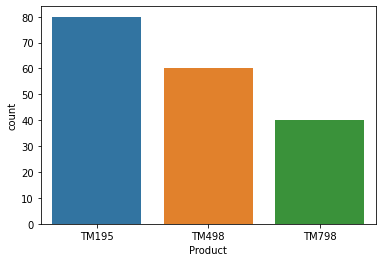

In [129]:
sns.countplot(data=CardioFitnessData,x='Product')

We can see Product TM195  is used the most and TM798 is  used the least.

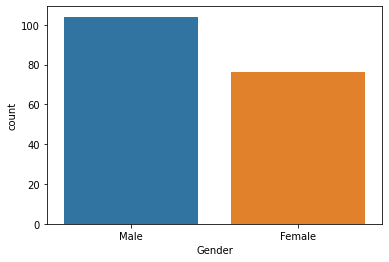

In [130]:
sns.countplot(data=CardioFitnessData,x='Gender')

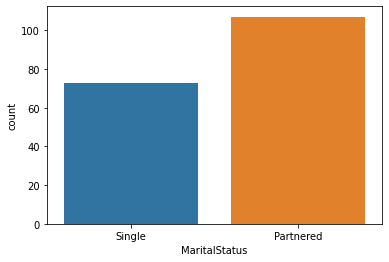

In [131]:
sns.countplot(data=CardioFitnessData,x='MaritalStatus')

Male tend to use  Fitness Product more than Females and Married/Partnered people are using Fitness Products more that single people.

# MultiVariate Analysis to understand relation and distribution between variables.

In [132]:
listofNumericalColumns=['Age','Education','Miles','Usage','Income','Fitness']

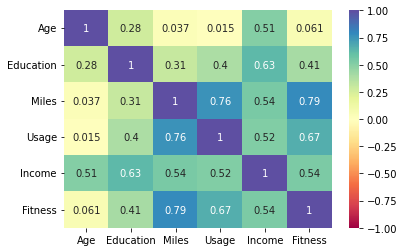

In [133]:
sns.heatmap(CardioFitnessData[listofNumericalColumns].corr(),annot=True,vmin=-1 ,vmax=1,cmap='Spectral')

Observations :
1.   We can see that there is high positive corelation between Fitness and Miles.People running more miles have high fitness score.
2.   We can see there is high positive corelation between Usage and Miles .People doing more usage run more miles.
3. People with more education level have more income and that can be seen in positive corelation between Education adn Income

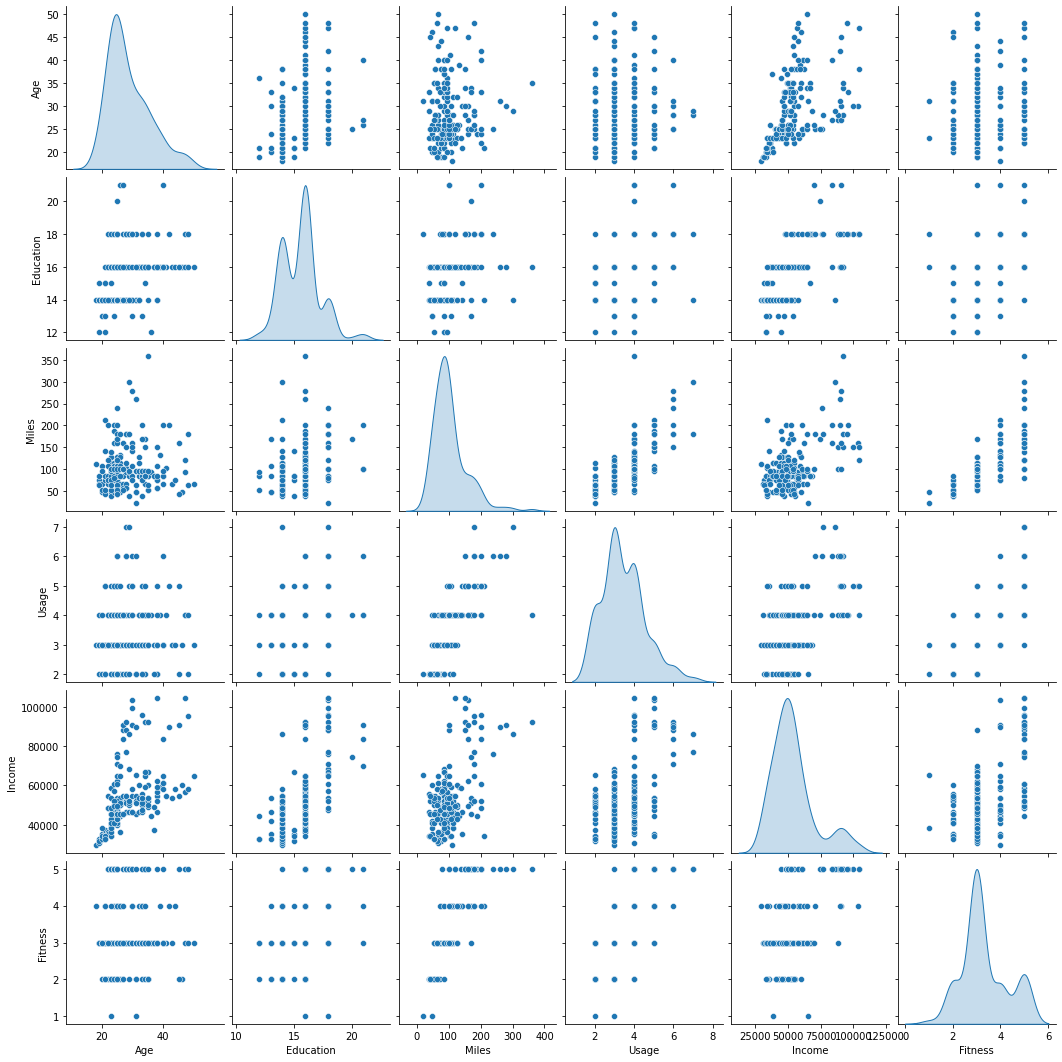

In [134]:
sns.pairplot(CardioFitnessData[listofNumericalColumns],diag_kind='kde')

Observation
1.   We can see there is linear relationship between usage and Miles   and Miles and Fitness . Which helps us understand people who are exercising often are running more miles and are more Fit .

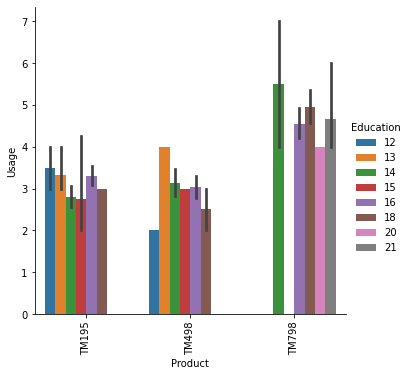

In [135]:
sns.catplot(x='Product', y='Usage', data=CardioFitnessData, kind="bar", hue='Education')
plt.xticks(rotation=90)
plt.show()

Observation : People with higher education level prefer to use TM798 over other two products.

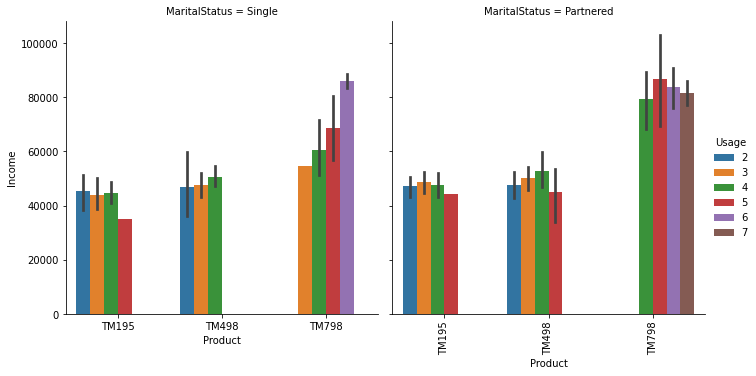

In [136]:
sns.catplot(x='Product', y='Income', data=CardioFitnessData, kind="bar", hue='Usage',col='MaritalStatus')
plt.xticks(rotation=90)
plt.show()

We can see that Product TM798 is used by high income people.Also frequency of  the usage is almost same for TM195 and TM498 whereas frequency of usage is  higher for TM798.People with Marital status as'Partnered' are using TM798 more often.

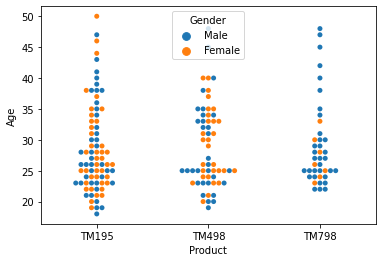

In [137]:
sns.swarmplot(data=CardioFitnessData,x="Product",y="Age",hue="Gender")

 Females are using TM195 and TM498 more as compared to TM798 .TM798 is used by users with Age less than 30  whereas Product TM195 and TM498 is used by many customers upto 40 years . Also TM498 has many male users as comapred to Female users.
 

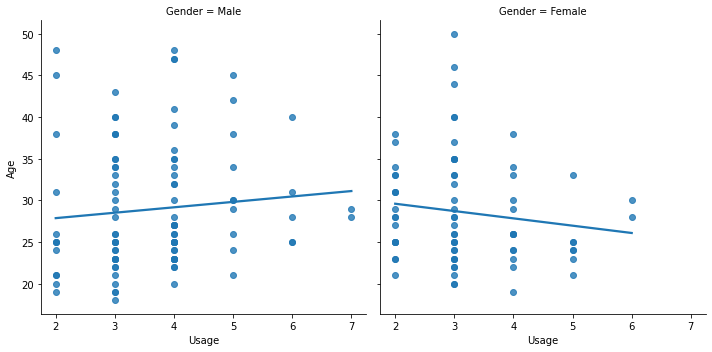

In [138]:
sns.lmplot(data=CardioFitnessData,x="Usage",y="Age",col="Gender" ,ci=False)

Looking at lmplot we can see that there is upward tread between Age and Usage for Male whose age is between 25 to 30 .For females there is downward treand  between Age and usage . As Age increases usage is decresing.

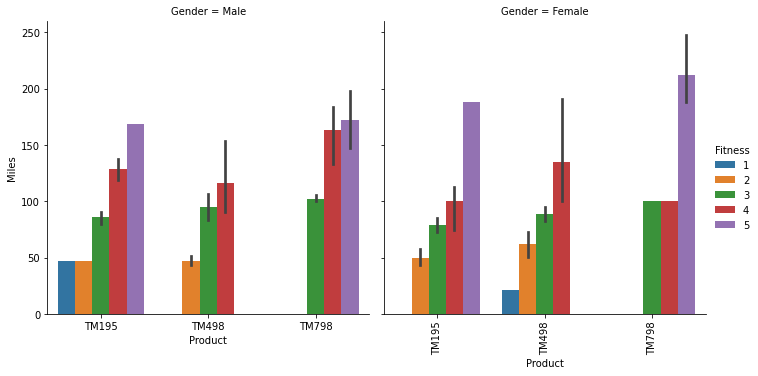

In [139]:
sns.catplot(x='Product', y='Miles', data=CardioFitnessData, kind="bar",col='Gender' ,hue="Fitness")
plt.xticks(rotation=90)
plt.show()

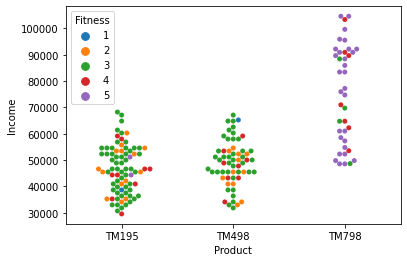

In [140]:
sns.swarmplot(data=CardioFitnessData,x="Product",y="Income",hue="Fitness" )

Looking at swarmplot it appears that people who rank themselves higher in Fitness rank tend to use TM798 more also this product is used by high income users whereas TM195 and TM498 have same income level users.USers with Fitness level 1 ans 2 are not using TM798.

# Outlier Detection
  Let us plot BoxPlot for all numerical columns for Outlier detection  

We will write a user defined Function which will take Data Frame, List of columns for which we want to plot Box plots and number of rows and columns in which we want to see output .

In [141]:
def PlotMultipleBoxPlots(dataFrameName,colList,noofrows,nocols):
  plt.figure(figsize=(12,12))
  for i,NumericColumn in enumerate(colList):
    plt.subplot(noofrows,noofrows,i+1)
    plt.boxplot(dataFrameName[NumericColumn],showmeans=True)
    plt.title(NumericColumn)
  plt.show()

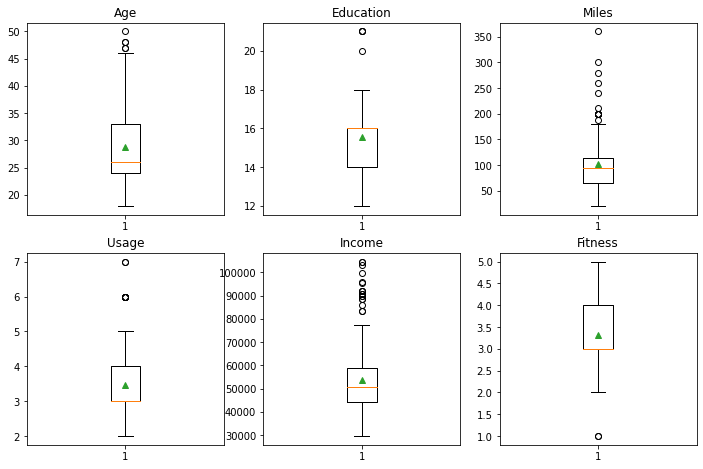

In [142]:
PlotMultipleBoxPlots(CardioFitnessData,listofNumericalColumns,3,3)

We can see all numerical columns have outliers . Age , Fitness ,Usage, Education have very few outliers whereas Miles and Income have sizable outliers .But we have see there is relation between income and particular product which is used hence we will not treat these outliers.

#  Conclusion and Recommandation

 I have analysed data related to customers of the treadmill product of a retail store called Cardio Good Fitness. CardiFitness Data comprised of 180 observations of 9 variables names (Product, Age, Education, Fitness, Usage, Miles, Income, Marital Status and Gender) with zero missing data.

1.   We could see that Product TM195 is most used product TM498 is the second most used and TM798 is the least used product among all three products.
2.   TM195 and TM498 is prefered by people with income range from 30000 to 60000.We don't have product cost with us but looking at these data it appears that cost of this Product must be less as compared to cost of product TM798.
3.   Most of the users who term themself as very FIT (Fitness score 5) and have high income group prefers to use TM798. 
4.  For TM195 and TM498 products Male, Female usage ratio is almost same but for TM798 there are more male users as compared to Female users 
5. It is observed that Females with more Age are doing less weekly usage of these products.
6. People with high education level prefer to use TM798,as mostly with high education there is high income and TM798 is prefered by high income group which might imply that the price and features of TM798 might be more than other two products. But  to confim this we would need additional price data  of  these products .

We need some addditional Data  and also additional parameters like price range of these products to understand if we can recommand some discount or installment schemes on these products . 

Recommendations

1. Looking at customer data ,TM798 needs to be promoted more as this is used by less customers but customer with high fitness score are prefering this so it's feature needs to be highlighted in promotions. 

2. Store should run some compain  targetting Females with Age group 35 and above  to show importance of more weekly usage of treadmills to stay fit.

3. Based on Customer Usage pattern ,product TM195 and TM498 should be recommanded for the custers who have low to moderate usage and Fitness goals  and for customer with high usage and Fitness goals TM798 shoould be refered.